20 13
('^MERV', True, False, 5.829417929163995)
('TEO', True, False, 1.0889247295690416)
('DESP', True, False, 5.341942206868104)
('MELI', False, True, -4.976169809608853)
('GLOB', True, False, 1.119948805476524)
('BMA', False, True, -4.733016514269264)
('BBAR', False, True, -2.7404212121175693)
('SUPV', False, True, -1.732953638505438)
('GGAL', True, False, 0.8043529510590511)
('TS', False, True, -3.019773034348162)
('TX', True, False, 1.8031313669787643)
('PAM', True, False, 5.862355657301967)
('EDN', True, False, 13.91190151754679)
('CEPU', True, False, 1.258915028969514)
('YPF', True, False, 1.392482176247074)
('PBR', True, False, 1.7947238755189912)
('TGS', True, False, 3.545002235479138)
('LOMA', True, False, 1.374845820422658)
('IRS', False, True, -3.7287634843793125)
('CRESY', False, True, -0.7781437535057231)


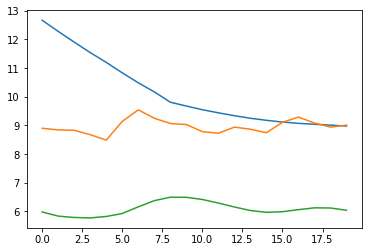

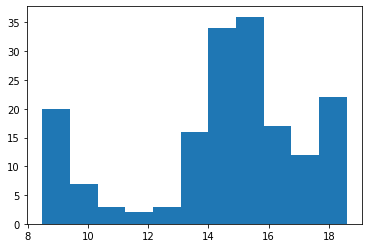

{'mean': 14.474476749582806, 'min': 8.486666679382324, 'max': 18.586666742960613, 'var': 2.764763958329402, 'var_min_max': 0.6977799777024339}


In [6]:
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data_set, periods=3):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

def ma_n(close, len_ma):
    len_close = close.size
    
    ma_close = np.zeros(len_close)
    std_close = np.zeros(len_close)
    

    if len_close > 2.0 * len_ma:
        for i in range(len_close - len_ma):
            ma_close[i+len_ma] = close[i: i+len_ma ].mean()
            std_close[i+len_ma] = close[i: i+len_ma ].std()
    return ma_close

def get_close(ticker, begin, end):

    ypf = YahooFinancials(ticker)
    prices = ypf.get_historical_price_data(begin, end, 'daily')[ticker]['prices']
    
    
    
    volume = np.zeros(len(prices)) 
    close = np.zeros(len(prices))
    for i, price in enumerate(prices):
        close[i] = (price['high'] + price['open'] + price['close']) / 3.0
        volume[i] = price['volume']
    
    
    return close, volume

def get_status_ma(ticker, begin, end, len_ma, short_period=3):
    close, volume = get_close(ticker, begin, end)
    ma_short = ma_n(close, short_period)
    ma_close = ma_n(close, len_ma)
    close = ma_short

    criterio = (close[close.size-1] - ma_close[ma_close.size-1]) / close[close.size-1]
    
    return criterio > 0, criterio < 0, 100 * criterio, close
        
# newlist=sorted(prices, key = lambda k:k['volume'])
    
ticker = 'YPF'

tickers = ['^MERV', 'TEO', 'DESP', 'MELI', 'GLOB', 'BMA','BBAR', 'SUPV', 'GGAL', 'TS', 
            'TX', 'PAM', 'EDN', 'CEPU', 'YPF', 'PBR', 'TGS', 'LOMA', 'IRS', 'CRESY']

tickers_ = ['^DJI',  'F', 'GM', 'MSFT', 'IBM', 'AAPL', 'INTC']


begin = '2019-01-21'
end = '2019-09-26'
len_ma = 20


close, volume = get_close(ticker, begin, end)
ma_close = ma_n(close, len_ma)

for i,ticker in enumerate(tickers):
    gt, lt, pc, short_ma =  get_status_ma(ticker, begin, end, len_ma)
    tickers[i] = (ticker, gt, lt, pc)

print(len(tickers), sum([t[1] for t in tickers]))

for t in tickers:
    print(t)
    
plt.plot(ma_close[close.size-20:])
plt.plot(close[close.size-20:])
plt.plot(short_ma[close.size-20:])

plt.show()

hist = np.histogram(close)


plt.hist(close, bins='auto')

plt.show()

dict_ = {'mean': close.mean(), 
         'min': close.min(), 
         'max': close.max(),
         'var': close.std()}

dict_['var_min_max'] = (dict_['max'] - dict_['min'])/dict_['mean']

print(dict_)

2015-01-01    79.070000
2015-01-02    76.250000
2015-01-03    74.990000
2015-01-04    74.590000
2015-01-05    74.440001
                ...    
2018-03-28    26.180000
2018-03-29    26.820001
2018-03-30    26.599999
2018-03-31    26.240001
2018-04-01    27.320000
Freq: D, Length: 1187, dtype: float64

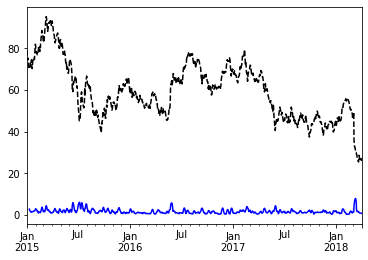

In [93]:
import pandas as pd
import numpy as np
%matplotlib inline

# some sample data
ts = pd.Series(close, index=pd.date_range(begin, periods=1187))

#plot the time series
ts.plot(style='k--')

# calculate a 60 day rolling mean and plot
# ts.rolling(window=10).mean().plot(style='k')

# add the 20 day rolling standard deviation:
ts.rolling(window=10).std().plot(style='b')
ts

In [7]:
def bollinger_n(close, len_ma):
    len_close = close.size
    
    ma_close = np.zeros(len_close)
    std_close = np.zeros(len_close)
    

    if len_close > 2.0 * len_ma:
        for i in range(len_close - len_ma):
            ma_close[i+len_ma] = close[i: i+len_ma ].mean()
            std_close[i+len_ma] = close[i: i+len_ma ].std()
    return ma_close + 2 * std_close, ma_close, ma_close - 2 * std_close 

In [10]:
ticker = 'YPF'
begin = '2018-01-21'
end = '2019-09-26'
len_ma = 20


close, volume = get_close(ticker, begin, end)
up, mid, low = bollinger_n(close, len_ma)

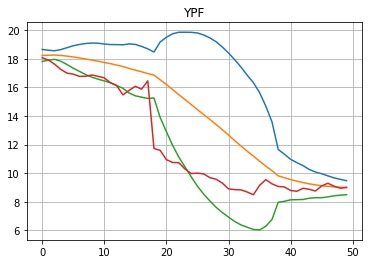

In [16]:
delay = 50
plt.plot(up[up.size - delay:])
plt.plot(mid[up.size - delay:])
plt.plot(low[up.size - delay:])
plt.plot(close[up.size - delay:])
plt.title(ticker)
plt.grid(True)
plt.show()

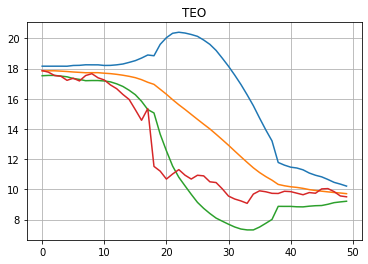

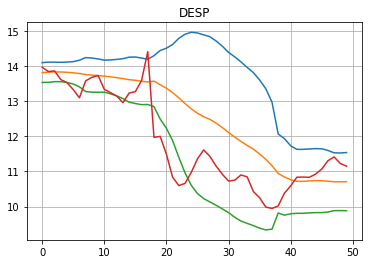

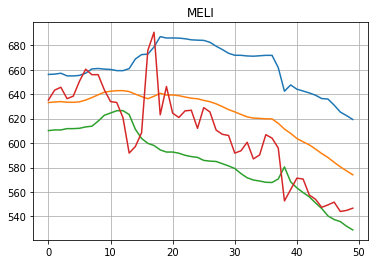

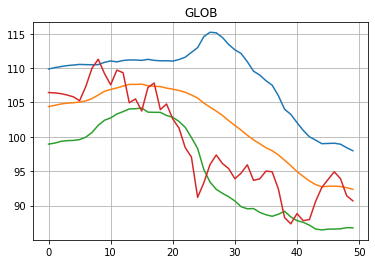

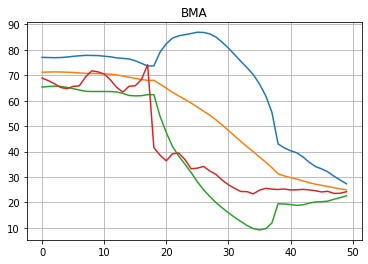

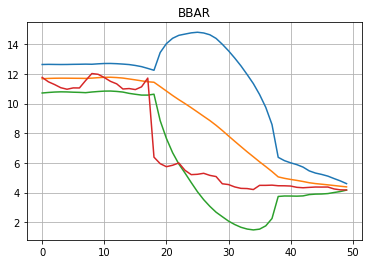

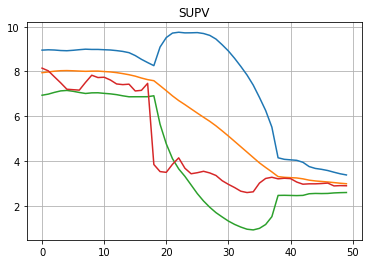

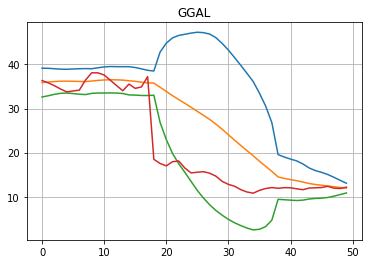

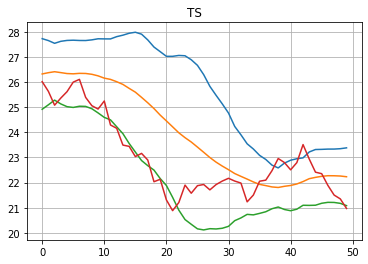

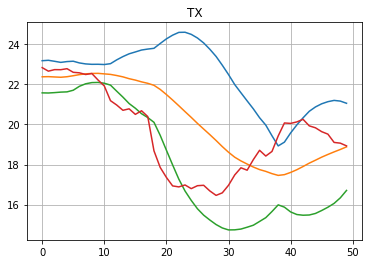

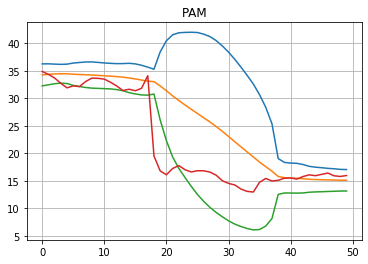

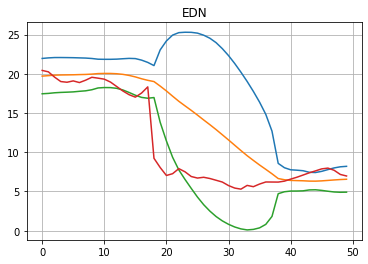

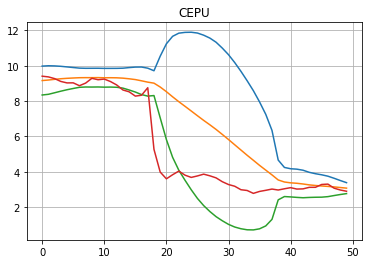

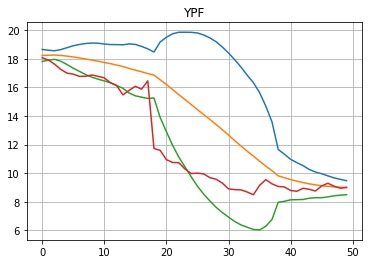

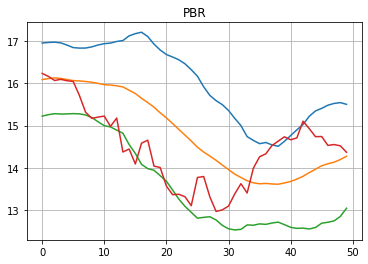

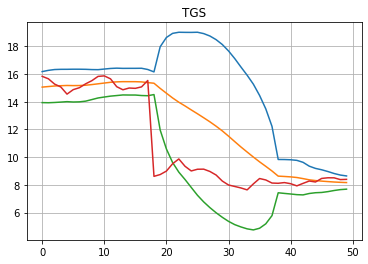

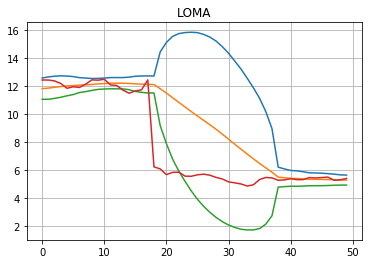

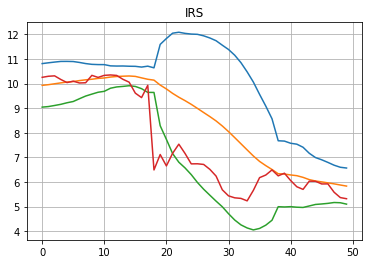

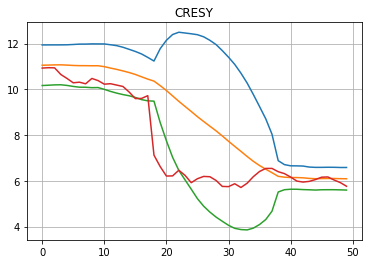

In [21]:
tickers = ['TEO', 'DESP', 'MELI', 'GLOB', 'BMA','BBAR', 'SUPV', 'GGAL', 'TS', 
            'TX', 'PAM', 'EDN', 'CEPU', 'YPF', 'PBR', 'TGS', 'LOMA', 'IRS', 'CRESY']
delay = 50
for ticker in tickers:
    close, volume = get_close(ticker, begin, end)
    up, mid, low = bollinger_n(close, len_ma)
    
    plt.plot(up[up.size - delay:])
    plt.plot(mid[up.size - delay:])
    plt.plot(low[up.size - delay:])
    plt.plot(close[up.size - delay:])
    plt.title(ticker)
    plt.grid(True)
    plt.show()